# Importing Libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score

#  Reading Data File

In [2]:
df=pd.read_csv("C:\\Users\\ankit\\Downloads\\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.drop(columns=["Id"],inplace=True)

In [5]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#  Data Visualization for Selecting Algorithm

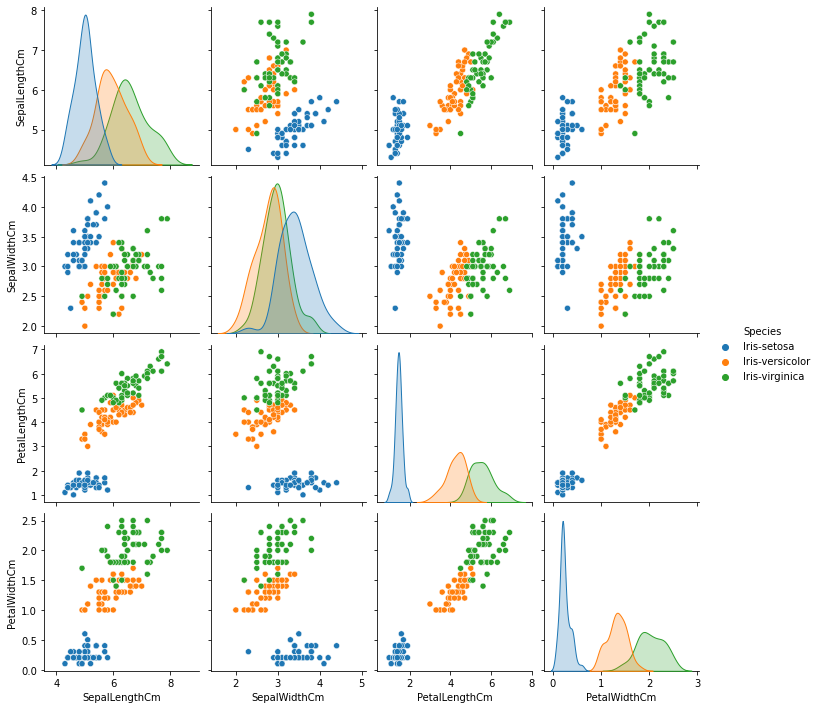

In [6]:
sns.pairplot(df,hue='Species')

In [7]:
# Labeling data by using LabelEncoder
label=LabelEncoder()
df["Species"]=label.fit_transform(df["Species"])

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Dividing the data in Attributes and Label

In [9]:
X=df.drop("Species",axis=1)
y=df["Species"]

# Split Data in test and train

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#  Predicting using DecisionTreeClassifier

In [11]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
predict_dt=dt.predict(X_test)
print(classification_report(y_test,predict_dt))
print(confusion_matrix(y_test,predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [15]:
## Comparison b/w Actual data and Predicted data
pre=pd.DataFrame({"Species":y_test,"Prediction":predict_dt})
pre.head()

,Species,Prediction
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


# Accuracy of Model

In [21]:
accuracy=accuracy_score(y_test,predict_dt)
accuracy

1.0

# Visualizing DecisionTreeClassifier

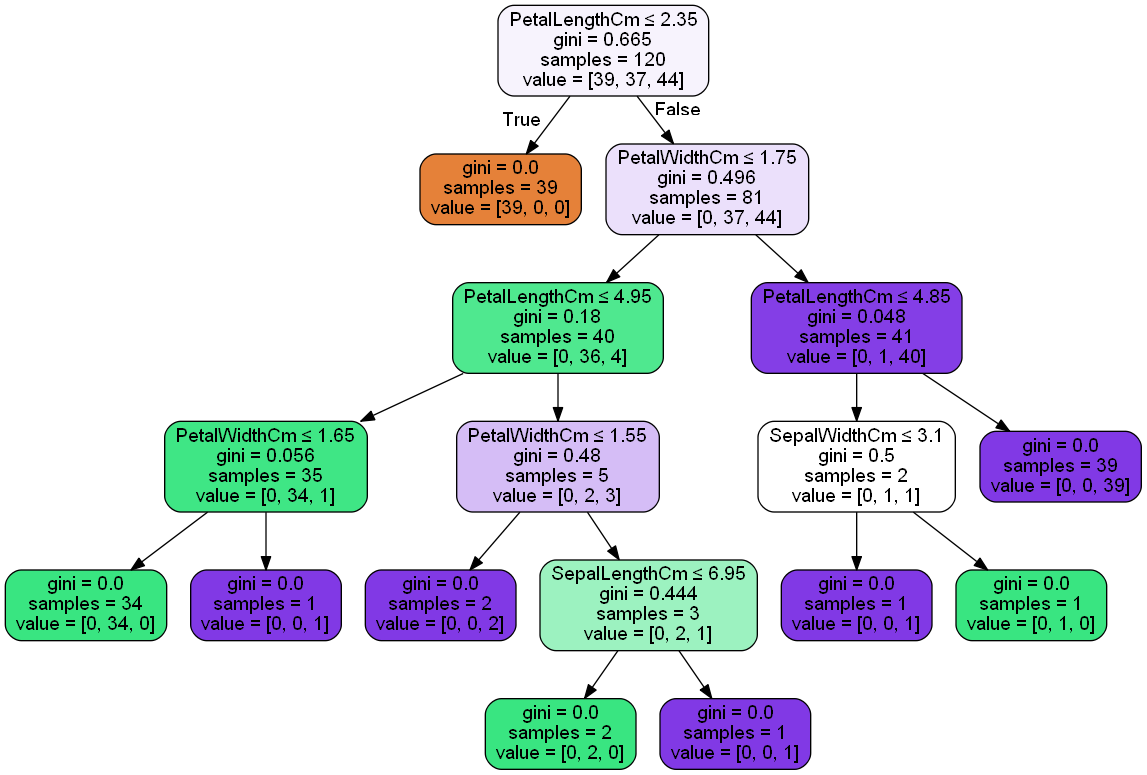

In [22]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
new_column=df.select_dtypes(include=float).columns
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=new_column,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())